In [311]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from scipy.stats import pearsonr
import scipy.stats as stats



In [312]:
#Pull CSVs

#Required CSV
required_csv = "Resources (2)/kindergarten_requirement_per_state.csv"
required_df=pd.read_csv(required_csv)

#Graduation Rates
graduation_csv="Resources (2)/Graduation_Rate_by_State.csv"
graduation_df = pd.read_csv(graduation_csv)

#Testing Scores
testing4math_csv = "Resources (2)/4th_grade_2019_NAEP_Math.csv"
testing4math_df = pd.read_csv(testing4math_csv)

testing4reading_csv = "Resources (2)/4th_grade_2019_NAEP_Reading.csv"
testing4reading_df = pd.read_csv(testing4reading_csv)

testing4science_csv = "Resources (2)/4th_Grade_2019_NAEP_Science.csv"
testing4science_df = pd.read_csv(testing4science_csv)

testing8math_csv = "Resources (2)/8th_Grade_2019_NAEP_Math.csv"
testing8math_df = pd.read_csv(testing8math_csv)

testing8reading_csv = "Resources (2)/8th_Grade_2019_NAEP_Reading.csv"
testing8reading_df = pd.read_csv(testing8reading_csv)

testing8science_csv = "Resources (2)/8th_Grade_2019_NAEP_Science.csv"
testing8science_df = pd.read_csv(testing8science_csv)

#Income CSV
income_csv = "Resources (2)/2018_Census_Median_Household_Income_by_State.csv"
incomes_df = pd.read_csv(income_csv)

In [313]:
#Part 1: Graduation Rates
graduation_df

,State,Graduation Rate
0,Alabama,0.90
1,Alaska,0.79
2,Arizona,0.79
3,Arkansas,0.89
4,California,0.83
5,Colorado,0.81
6,Connecticut,0.88
7,Delaware,0.87
8,District of Columbia,0.69
9,Florida,0.86


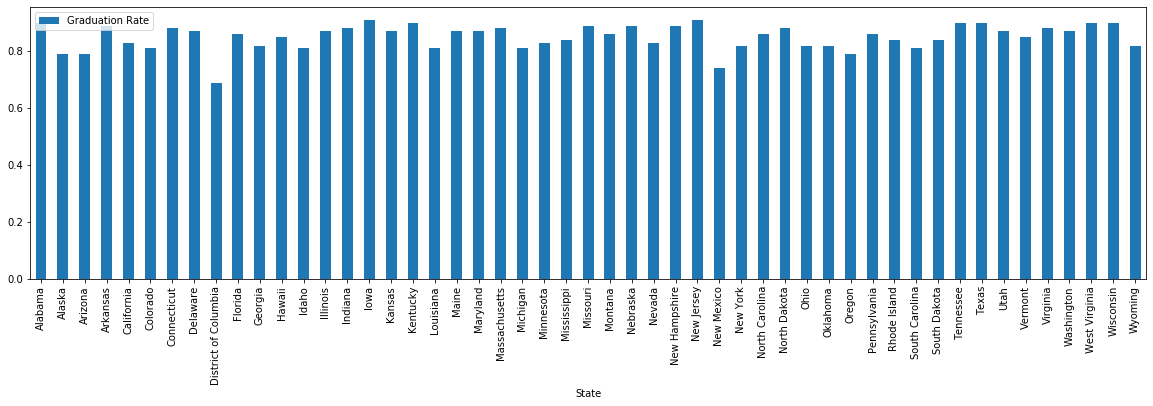

In [314]:
rates_df = required_df.merge(graduation_df, on = "State")
bar_df = rates_df[["State", "Graduation Rate", "Requirement"]].copy()
bar_df = bar_df.set_index("State")

colour = []
#for state in bar_df["Requirement"]:
#    if bar_df.loc[state, "Requirement"] == "Yes":
#        colour.append("blue")
#    else:
#        colour.append("green")

#my_color=np.where(bar_df["Requirement"] == "Yes", 'blue', 'green')
bar_df.plot(kind="bar", figsize=(20,5))


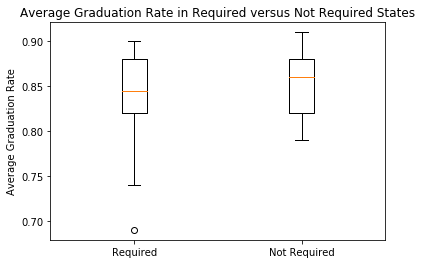

In [315]:
rates_df=required_df.merge(graduation_df, on="State")
rates_df

grad_yes = rates_df["Requirement"].str.contains("Yes")
gy=rates_df[grad_yes]
grad_y=gy["Graduation Rate"]

grad_no = rates_df["Requirement"].str.contains("No")
gn=rates_df[grad_no]
grad_n=gn["Graduation Rate"]

fig1, ax1 = plt.subplots()

ax1.set_title('Average Graduation Rate in Required versus Not Required States')
ax1.set_ylabel('Average Graduation Rate')
labels=["Required", "Not Required"]

ax1.boxplot([grad_y, grad_n], labels=labels)

plt.show()

In [316]:
t2, p2 = stats.ttest_ind(grad_y,grad_n)
print("t = " + str(t2))
print("p = " + str(p2))
if p2 <= 0.05:
    print("The difference is statistically significant")
else:
    print("The difference is not statistcally significant")   
    


t = -1.1036462926499377
p = 0.2751372120442433
The difference is not statistcally significant


t = -0.4710340877075364
p = 0.6397501620450424
The difference is not statistcally significant


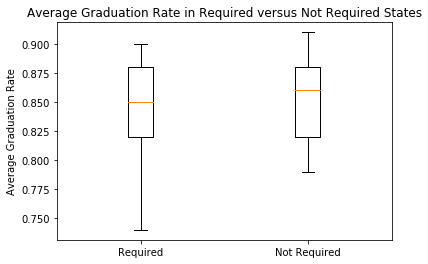

In [233]:
#eliminate DC from test (outlier)

rates_df
out_df = rates_df.drop(index=8)
out_df = out_df.reset_index(drop=True)
out_df

outgrad_yes = out_df["Requirement"].str.contains("Yes")
outgy=out_df[outgrad_yes]
outgrad_y=outgy["Graduation Rate"]

outgrad_no = out_df["Requirement"].str.contains("No")
outgn=out_df[outgrad_no]
outgrad_n=outgn["Graduation Rate"]

t3, p3 = stats.ttest_ind(outgrad_y,outgrad_n)
print("t = " + str(t3))
print("p = " + str(p3))
if p3 <= 0.05:
    print("The difference is statistically significant")
else:
    print("The difference is not statistcally significant")   
fig1, ax1 = plt.subplots()

ax1.set_title('Average Graduation Rate in Required versus Not Required States')
ax1.set_ylabel('Average Graduation Rate')
labels=["Required", "Not Required"]

ax1.boxplot([outgrad_y, outgrad_n], labels=labels)

plt.show()

In [234]:
#Part 2: Testing scores

#Merge all Testing Scores
test_df = required_df.merge(testing4math_df, on = "State")
test_df = test_df.merge(testing4reading_df, on  = "State", suffixes = (" 4th Grade Math", " 4th Grade Reading"))
test_df = test_df.merge(testing4science_df, on = "State")
test_df = test_df.merge(testing8math_df, on  = "State", suffixes = (" 4th Grade Science", " 8th Grade Math"))
test_df = test_df.merge(testing8reading_df, on ="State")
test_df = test_df.merge(testing8science_df, on = "State", suffixes = (" 8th Grade Reading", " 8th Grade Science"))


test_df

,State,State Abbrevation,Requirement,Test Score 4th Grade Math,Test Score 4th Grade Reading,Test Score 4th Grade Science,Test Score 8th Grade Math,Test Score 8th Grade Reading,Test Score 8th Grade Science
0,Alabama,AL,No,230,212,145.0,269,253.0,141.0
1,Alaska,AK,No,232,204,NaN,274,NaN,NaN
2,Arizona,AZ,No,238,216,149.0,280,257.0,148.0
3,Arkansas,AR,Yes,233,215,150.0,274,260.0,148.0
4,California,CA,No,235,216,140.0,276,250.0,143.0
5,Colorado,CO,No,242,225,NaN,285,NaN,NaN
6,Connecticut,CT,Yes,243,224,154.0,286,267.0,155.0
7,Delaware,DE,Yes,239,218,150.0,277,267.0,149.0
8,District of Columbia,DC,Yes,235,214,NaN,269,240.0,NaN
9,Florida,FL,No,246,225,158.0,279,261.0,153.0


In [296]:
test_yes = test_df["Requirement"].str.contains("Yes")
ty=test_df[test_yes]
#test_y=ty["Graduation Rate"]

test_no = test_df["Requirement"].str.contains("No")
tn=test_df[test_no]
#test_n=tn["Graduation Rate"]

ty.describe()

,Test Score 4th Grade Math,Test Score 4th Grade Reading,Test Score 4th Grade Science,Test Score 8th Grade Math,Test Score 8th Grade Reading,Test Score 8th Grade Science
count,18.000000,18.000000,16.0000,18.000000,16.000000,16.000000
mean,237.833333,217.611111,152.5625,278.055556,259.562500,152.375000
std,4.435817,4.447589,5.7500,6.448641,7.632988,5.289928
min,231.000000,208.000000,142.0000,269.000000,240.000000,143.000000
25%,235.250000,215.250000,150.0000,274.000000,255.500000,149.000000
50%,239.000000,218.000000,153.0000,276.000000,261.000000,151.000000
75%,240.750000,220.000000,156.2500,284.500000,264.750000,156.250000
max,247.000000,224.000000,165.0000,289.000000,269.000000,160.000000


In [297]:
tn.describe()

,Test Score 4th Grade Math,Test Score 4th Grade Reading,Test Score 4th Grade Science,Test Score 8th Grade Math,Test Score 8th Grade Reading,Test Score 8th Grade Science
count,33.000000,33.000000,30.000000,33.000000,26.000000,30.000000
mean,240.757576,220.515152,155.466667,282.666667,264.346154,155.766667
std,4.301383,4.790102,6.123631,5.224143,5.705733,6.652370
min,230.000000,204.000000,140.000000,269.000000,250.000000,140.000000
25%,238.000000,218.000000,153.250000,280.000000,262.250000,152.250000
50%,241.000000,221.000000,156.500000,283.000000,265.000000,156.500000
75%,244.000000,223.000000,159.750000,286.000000,268.000000,160.000000
max,248.000000,231.000000,165.000000,294.000000,272.000000,166.000000


For 4th Grade Math
t = -2.294999694657205
p = 0.026054855644176138
The difference is statistically significant


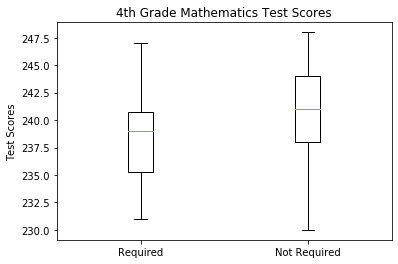

In [303]:

print("For 4th Grade Math")
testt, testp = stats.ttest_ind(ty["Test Score 4th Grade Math"],tn["Test Score 4th Grade Math"])
print("t = " + str(testt))
print("p = " + str(testp))


if testp <= 0.05:
    print("The difference is statistically significant")
else:
    print("The difference is not statistcally significant")   

# plt.scatter(ty["State"], ty["Test Score 4th Grade Math"], color="r")
# plt.scatter(tn["State"], tn["Test Score 4th Grade Math"], color = "salmon")
# plt.xlabel("States")
# plt.ylabel("Test Score")
# plt.title("4th Grade Math Test Scores")
# plt.legend(labels = ("Requires Kindergarten", "Does Not Require Kindergarten"))

fig1, ax1 = plt.subplots()

ax1.set_title('4th Grade Mathematics Test Scores')
ax1.set_ylabel('Test Scores')
labels=["Required", "Not Required"]

ax1.boxplot([ty["Test Score 4th Grade Math"], tn["Test Score 4th Grade Math"]], labels=labels)

plt.show()

For 4th Grade Reading
t = -2.120368751116901
p = 0.0390621255330835
The difference is statistically significant


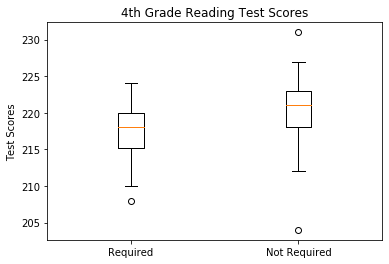

In [305]:

# plt.scatter(ty["State"], ty["Test Score 4th Grade Reading"], color="blue")
# plt.scatter(tn["State"], tn["Test Score 4th Grade Reading"], color = "lightskyblue")
# plt.xlabel("States")
# plt.ylabel("Test Score")
# plt.title("4th Grade Reading Test Scores")
# plt.legend(labels = ("Requires Kindergarten", "Does Not Require Kindergarten"))

print("For 4th Grade Reading")
testt, testp = stats.ttest_ind(ty["Test Score 4th Grade Reading"],tn["Test Score 4th Grade Reading"])
print("t = " + str(testt))
print("p = " + str(testp))
if testp <= 0.05:
    print("The difference is statistically significant")
else:
    print("The difference is not statistcally significant")   
    

fig1, ax1 = plt.subplots()

ax1.set_title('4th Grade Reading Test Scores')
ax1.set_ylabel('Test Scores')
labels=["Required", "Not Required"]

ax1.boxplot([ty["Test Score 4th Grade Reading"], tn["Test Score 4th Grade Reading"]], labels=labels)

plt.show()


For 4th Grade Science
t = -1.5638449274852932
p = 0.1250185924842891
The difference is not statistcally significant


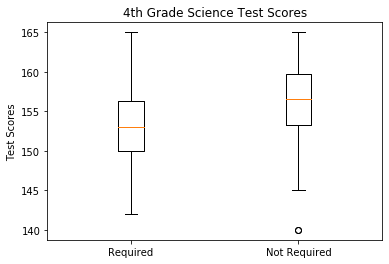

In [306]:
sci4= test_df.drop(index=([1, 5, 8, 18, 38]))


test_yes = sci4["Requirement"].str.contains("Yes")
ty=sci4[test_yes]
#test_y=ty["Graduation Rate"]

test_no = sci4["Requirement"].str.contains("No")
tn=sci4[test_no]
#test_n=tn["Graduation Rate"]

print("For 4th Grade Science")
testt, testp = stats.ttest_ind(ty["Test Score 4th Grade Science"],tn["Test Score 4th Grade Science"])
print("t = " + str(testt))
print("p = " + str(testp))
if testp <= 0.05:
    print("The difference is statistically significant")
else:
    print("The difference is not statistcally significant")   

# plt.scatter(ty["State"], ty["Test Score 4th Grade Science"], color="forestgreen")
# plt.scatter(tn["State"], tn["Test Score 4th Grade Science"], color = "lightgreen")
# plt.xlabel("States")
# plt.ylabel("Test Score")
# plt.title("4th Grade Science Test Scores")
# plt.legend(labels = ("Requires Kindergarten", "Does Not Require Kindergarten"))

fig1, ax1 = plt.subplots()

ax1.set_title('4th Grade Science Test Scores')
ax1.set_ylabel('Test Scores')
labels=["Required", "Not Required"]

ax1.boxplot([ty["Test Score 4th Grade Science"], tn["Test Score 4th Grade Science"]], labels=labels)

plt.show()


For 8th Grade Math
t = -2.2072650536232805
p = 0.03255688551735612
The difference is statistically significant


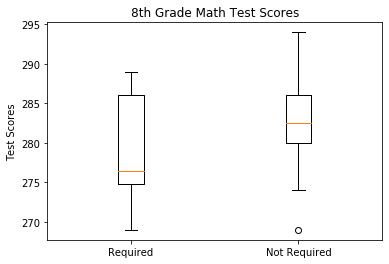

In [307]:
print("For 8th Grade Math")
testt, testp = stats.ttest_ind(ty["Test Score 8th Grade Math"],tn["Test Score 8th Grade Math"])
print("t = " + str(testt))
print("p = " + str(testp))
if testp <= 0.05:
    print("The difference is statistically significant")
else:
    print("The difference is not statistcally significant")   
    
# plt.scatter(ty["State"], ty["Test Score 8th Grade Math"], color="darkorange")
# plt.scatter(tn["State"], tn["Test Score 8th Grade Math"], color = "navajowhite")
# plt.xlabel("States")
# plt.ylabel("Test Score")
# plt.title("8th Grade Math Test Scores")
# plt.legend(labels = ("Requires Kindergarten", "Does Not Require Kindergarten"))

fig1, ax1 = plt.subplots()

ax1.set_title('8th Grade Math Test Scores')
ax1.set_ylabel('Test Scores')
labels=["Required", "Not Required"]

ax1.boxplot([ty["Test Score 8th Grade Math"], tn["Test Score 8th Grade Math"]], labels=labels)

plt.show()

For 8th Grade Reading
t = -2.3176530601342593
p = 0.025667799874275015
The difference is statistically significant


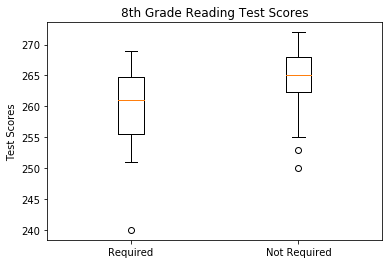

In [308]:
read8= test_df.drop(index=([1, 5,13,15,23,29,30,41,49]))

test_yes = read8["Requirement"].str.contains("Yes")
ty=read8[test_yes]
#test_y=ty["Graduation Rate"]

test_no = read8["Requirement"].str.contains("No")
tn=read8[test_no]
#test_n=tn["Graduation Rate"]

print("For 8th Grade Reading")
testt, testp = stats.ttest_ind(ty["Test Score 8th Grade Reading"],tn["Test Score 8th Grade Reading"])
print("t = " + str(testt))
print("p = " + str(testp))
if testp <= 0.05:
    print("The difference is statistically significant")
else:
    print("The difference is not statistcally significant")  

# plt.scatter(ty["State"], ty["Test Score 8th Grade Reading"], color="darkviolet")
# plt.scatter(tn["State"], tn["Test Score 8th Grade Reading"], color = "violet")
# plt.xlabel("States")
# plt.ylabel("Test Score")
# plt.title("8th Grade Reading Test Scores")
# plt.legend(labels = ("Requires Kindergarten", "Does Not Require Kindergarten"))


fig1, ax1 = plt.subplots()

ax1.set_title('8th Grade Reading Test Scores')
ax1.set_ylabel('Test Scores')
labels=["Required", "Not Required"]

ax1.boxplot([ty["Test Score 8th Grade Reading"], tn["Test Score 8th Grade Reading"]], labels=labels)

plt.show()

For 8th Grade Science
t = -1.760998576012649
p = 0.08518732218432806
The difference is not statistcally significant


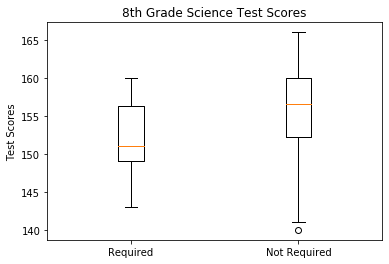

In [309]:
sci8= test_df.drop(index=([1, 5,8,18,38]))

test_yes = sci8["Requirement"].str.contains("Yes")
ty=sci8[test_yes]
#test_y=ty["Graduation Rate"]

test_no = sci8["Requirement"].str.contains("No")
tn=sci8[test_no]
#test_n=tn["Graduation Rate"]

print("For 8th Grade Science")
testt, testp = stats.ttest_ind(ty["Test Score 8th Grade Science"],tn["Test Score 8th Grade Science"])
print("t = " + str(testt))
print("p = " + str(testp))
if testp <= 0.05:
    print("The difference is statistically significant")
else:
    print("The difference is not statistcally significant") 
    
# plt.scatter(ty["State"], ty["Test Score 8th Grade Science"], color="teal")
# plt.scatter(tn["State"], tn["Test Score 8th Grade Science"], color = "aqua")
# plt.xlabel("States")
# plt.ylabel("Test Score")
# plt.title("8th Grade Science Test Scores")
# plt.legend(labels = ("Requires Kindergarten", "Does Not Require Kindergarten"))

# fig1, ax1 = plt.subplots()

# ax1.set_title('8th Grade Reading Test Scores')
# ax1.set_ylabel('Test Scores')
# labels=["Required", "Not Required"]

# ax1.boxplot([ty["Test Score 8th Grade Reading"], tn["Test Score 8th Grade Reading"]], labels=labels)

# plt.show()
fig1, ax1 = plt.subplots()

ax1.set_title('8th Grade Science Test Scores')
ax1.set_ylabel('Test Scores')
labels=["Required", "Not Required"]

ax1.boxplot([ty["Test Score 8th Grade Science"], tn["Test Score 8th Grade Science"]], labels=labels)

plt.show()

In [241]:
#Part 3: Income
income_df = required_df.merge(incomes_df, on = "State")

income_df


,State,State Abbrevation,Requirement,Median Household Income
0,Alabama,AL,No,49861
1,Alaska,AK,No,74346
2,Arizona,AZ,No,59246
3,Arkansas,AR,Yes,47062
4,California,CA,No,75277
5,Colorado,CO,No,71953
6,Connecticut,CT,Yes,76348
7,Delaware,DE,Yes,64805
8,District of Columbia,DC,Yes,85203
9,Florida,FL,No,55462


In [272]:
#income vs Graduation Rate
ingrad_df = income_df.merge(graduation_df, on = "State")
ingrad_df.columns
household = ingrad_df["Median Household Income "]
ingrad_df["Median Household Income "] = ingrad_df["Median Household Income "].astype(float)
corr = stats.pearsonr(ingrad_df["Median Household Income "],ingrad_df["Graduation Rate"])
corr

(-0.21763726322063215, 0.13304444929869313)

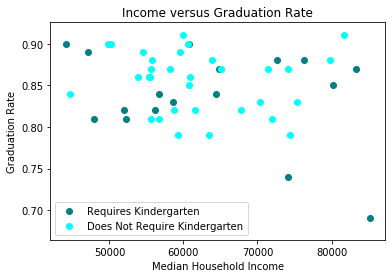

In [279]:
ingrad_df

ingrad_yes = ingrad_df["Requirement"].str.contains("Yes")
ingy=ingrad_df[ingrad_yes]
ingrad_y=ingy["Graduation Rate"]

ingrad_no = ingrad_df["Requirement"].str.contains("No")
ingn=ingrad_df[ingrad_no]
ingrad_n=ingn["Graduation Rate"]


plt.scatter(ingy["Median Household Income "], ingy["Graduation Rate"], color="teal")
plt.scatter(ingn["Median Household Income "], ingn["Graduation Rate"], color = "aqua")
plt.xlabel("Median Household Income")
plt.ylabel("Graduation Rate")
plt.title("Income versus Graduation Rate")
plt.legend(labels = ("Requires Kindergarten", "Does Not Require Kindergarten"))

t = 0.39302307570871997
p = 0.6960794922184232
The difference is not statistcally significant


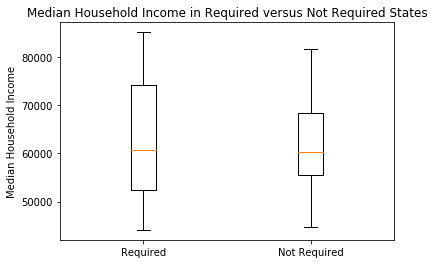

In [285]:
#eliminate DC from test (outlier)


ingrad_yes = ingrad_df["Requirement"].str.contains("Yes")
ingy=ingrad_df[ingrad_yes]
ingrad_y=ingy["Median Household Income "]

ingrad_no = ingrad_df["Requirement"].str.contains("No")
ingn=ingrad_df[ingrad_no]
ingrad_n=ingn["Median Household Income "]


t4, p4 = stats.ttest_ind(ingrad_y,ingrad_n)
print("t = " + str(t4))
print("p = " + str(p4))
if p3 <= 0.05:
    print("The difference is statistically significant")
else:
    print("The difference is not statistcally significant")   

fig1, ax1 = plt.subplots()
ax1.set_title('Median Household Income in Required versus Not Required States')
ax1.set_ylabel('Median Household Income')
labels=["Required", "Not Required"]

ax1.boxplot([ingrad_y, ingrad_n], labels=labels)


plt.show()